<a href="https://colab.research.google.com/github/Ipsit1234/QML-HEP-Evaluation-Test-GSOC-2021/blob/main/QML_HEP_GSoC_2021_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task I: Quantum Computing Part
1. implement a simple quantum operation with Cirq  
  a. With 5 qubits  
  b. Apply Hadamard operation on every qubit  
  c. Apply CNOT operation on (0,1), (1,2), (2, 3), (3, 4)  
  d. SWAP (0, 4)  
  e. Rotate X with pi/2  
  f. Plot the circuit




In [1]:
!pip install --quiet cirq
import cirq
from cirq.contrib.svg import SVGCircuit
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


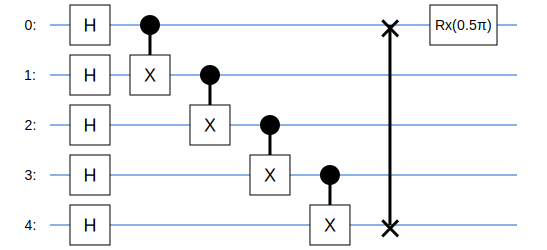

In [2]:
circuit = cirq.Circuit([cirq.H(q) for q in cirq.LineQubit.range(5)]) # circuit with 5 qubits and applying Hadamard on every qubit
circuit.append([cirq.CNOT(q, q+1) for q in cirq.LineQubit.range(4)]) # adding CNOT operation on (0,1), (1,2), (2, 3), (3, 4) 
circuit.append([cirq.SWAP(q, q+4) for q in cirq.LineQubit.range(1)]) # adding SWAP (0, 4)
circuit.append([cirq.rx(np.pi/2).on(q) for q in cirq.LineQubit.range(1)]) # adding rotate X with pi/2
SVGCircuit(circuit) # plotting the circuit

2. Create a circuit that is a series of small cirq.Rx rotations and plot the probability
of measuring the state in the |0⟩ state.

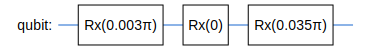

In [3]:
rot1 = cirq.rx(0.01) # small rotation angle 1
rot2 = cirq.rx(0.001) # small rotation angle 2
rot3 = cirq.rx(0.11) # small rotation angle 3
q = cirq.NamedQubit('qubit') # declared a qubit with name 'qubit'
circuit = cirq.Circuit([rot1(q), rot2(q), rot3(q)]) # creating a circuit with 3 small rotations in series
SVGCircuit(circuit) # printing the circuit

In [4]:
s = cirq.Simulator() # declaring the circuit simulator
result = s.simulate(circuit) # simulating the circuit
state_vector = result.final_state_vector # getting the final state vector
print('Probability of measuring the state in the |0> state is:', np.abs(state_vector[0])**2) # Probability of measuring 0
                                                                                             # is |alpha|^2 if final state vector
                                                                                             # is [alpha, beta]^T in (|0>, |1>) basis

Probability of measuring the state in the |0> state is: 0.9963440991725747
